In [1]:
import multiprocessing   as mp
import numpy             as np

import gym
import Portfolio_Gym
import A2C_V as A2C
import Factors_Wrapper as Wrapper

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
100%|██████████| 50000/50000 [03:41<00:00, 226.14it/s]
/Users/jakefowler/Documents/GitHub/rl-portfolio/A2C Agent/A2C_V.py:146: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-X))
100%|██████████| 50000/50000 [03:41<00:00, 225.8

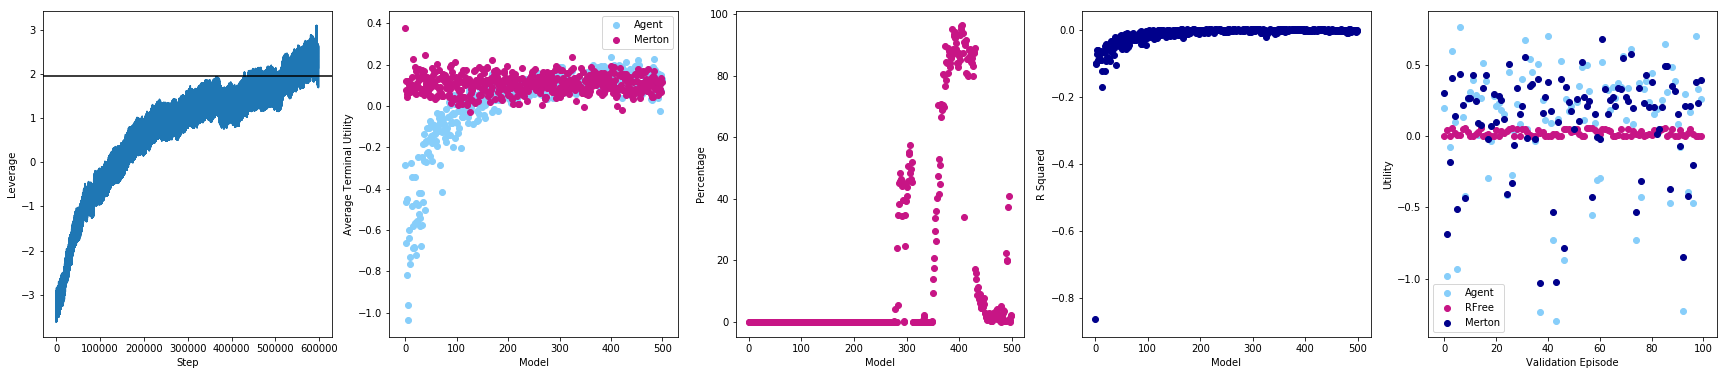

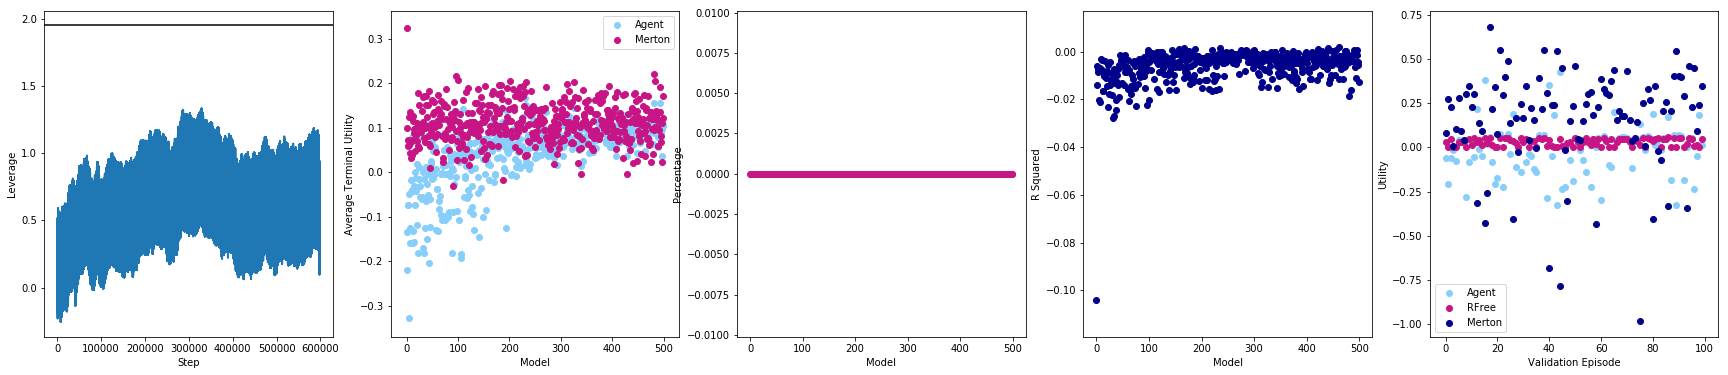

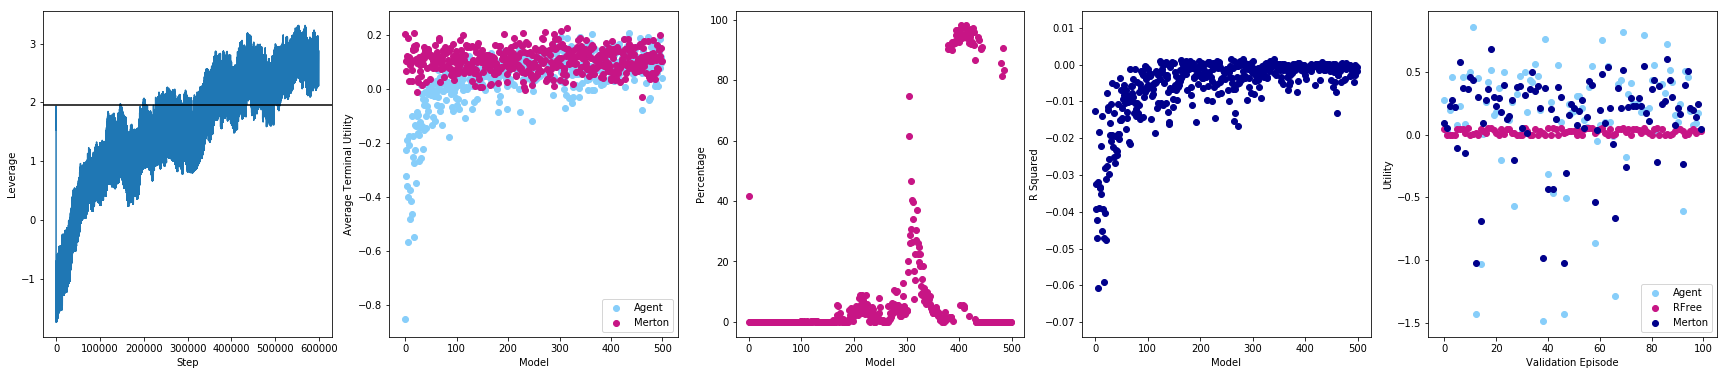

In [3]:
N_Eps  = int(5e4)

Actor_Hypers   = {"Learning Rate" : 0.075,
                  "Epoch"         : 3,
                  "Network Size"  : [8,8],
                  "Activation"    : "Sigmoid",
                  "Alpha"         : 0.0,
                  "Batch Size"    : 0}

Critic_Hypers = {"Learning Rate" : 0.075,
                 "Epoch"         : 3,
                 "Network Size"  : [8,8],
                 "Activation"    : "Sigmoid",
                 "Alpha"         : 0.0,
                 "Batch Size"    : 0}


# Function to facilitate mulitprocessing.
def Run(seed):
    np.random.seed(seed)
    Env = gym.make('Historical_Monthly-v0')
    Env.Set_Params(Risk_Aversion = 1,   Episode_Length = 12,   Max_Leverage  = 750,
                   Min_Leverage = -750)
 
    myAC = A2C.Actor_Critic(Env, Actor_Hypers, Critic_Hypers, 
                            Gamma = 0.999,    Sigma_Range = [2, 0.05],
                            Sigma_Anneal = 1, Retrain_Frequency = 100)
    
    myWrapper = Wrapper.Factors_Wrapper(myAC)
    myWrapper.Train(N_Eps, Plot = ['Mu', 'R_Squared', 'Merton_Benchmark', 
                                   'Percent_Merton_Action'])


# Run the investigation...
with mp.Pool(mp.cpu_count()) as pool:
    _ = pool.map(Run, np.random.randint(0, int(1e9), 3))

